### Download file

In [1]:
link = "https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/label_train00.npy"
# Download the file
!wget -O label_train00.npy $link

--2022-12-20 11:33:10--  https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/label_train00.npy
Resolving weisslab.cs.ucl.ac.uk (weisslab.cs.ucl.ac.uk)... 128.16.4.22
Connecting to weisslab.cs.ucl.ac.uk (weisslab.cs.ucl.ac.uk)|128.16.4.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524368 (512K) [application/octet-stream]
Saving to: ‘label_train00.npy’

label_train00.npy   100%[===================>] 512.08K  1.33MB/s    in 0.4s    

2022-12-20 11:33:11 (1.33 MB/s) - ‘label_train00.npy’ saved [524368/524368]



### Load the segmentation file

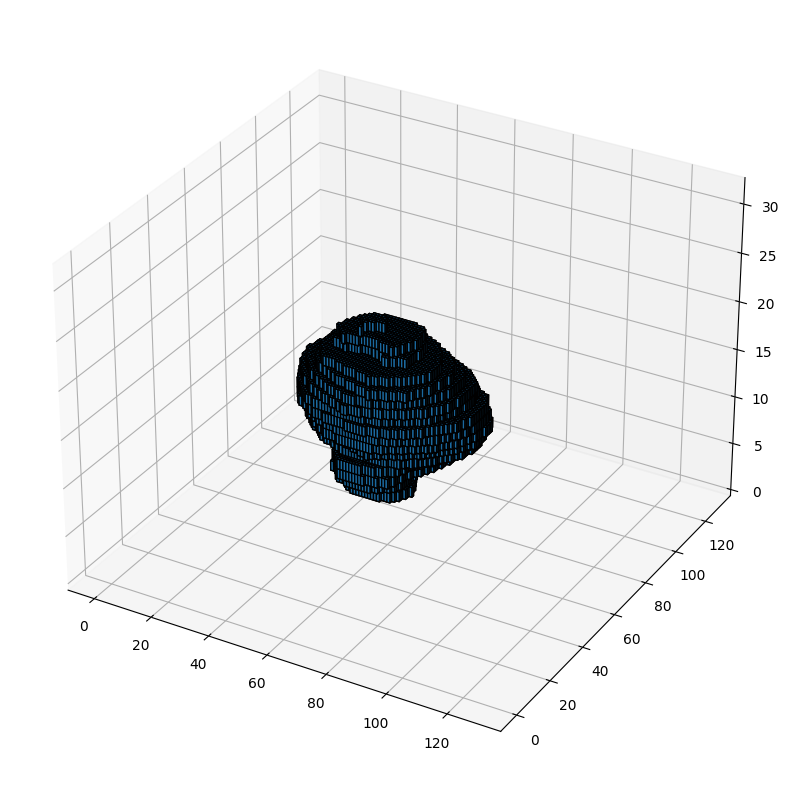

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from skimage import measure

# Load the data
label_train00 = np.load('label_train00.npy').T

# Visualise the data: 3D array with 128 rows, 128 columns and P slices
# Visualize 3D array
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(label_train00, edgecolor='k')
plt.show()

### Use skimage.measue.marching_cubes algorithim to compute vertex coordinates in mm and triangles for representing the segmentation boundary

Marching Cubes is an algorithm that can be used to extract a triangular mesh surface from a 3D image volume. 

The pixel spacing of an image can be used to determine the size of the voxels in the image. The pixel spacing is usually specified as the distance between adjacent voxels in millimeters, and it tells you the size of the voxels in the image.

For example, if the pixel spacing of an image is 0.5mm/voxel, it means that the voxels in the image are 0.5 millimeters in size. Similarly, if the pixel spacing is 0.1mm/voxel, it means that the voxels in the image are 0.1 millimeters in size.

The slice distance refers to the distance between slices in a 3D image. In medical imaging, the slice distance is often specified in millimeters and can be used to determine the thickness of the slices in the image.

If the slice distance of an image is 2mm/voxel, it means that the distance between slices in the image is 2 millimeters. This information is important because it tells you the thickness of the slices in the image and can help you interpret the image accurately. For example, if the slice distance is small (e.g., 0.5mm/voxel), the slices in the image will be relatively thin, and you will be able to see more detail in the image. On the other hand, if the slice distance is large (e.g., 5mm/voxel), the slices in the image will be relatively thick, and you may not be able to see as much detail in the image.

In [27]:
# Use marching cubes to obtain the vertex coordinates in mm and triangles
vertices, triangles, _, _ = measure.marching_cubes(label_train00, 0, spacing = (0.5, 0.5, 2))

# Print number of vertices and triangles
print(f"Number of vertices, {vertices.shape[0]}")
print(f"Number of triangeles, {triangles.shape[0]}")

# Print the first 10 vertices
print(f"first 3 vertices,  \n {vertices[:3]}")
# Print indices of the first 10 triangles
print(f"indices of first 3 triangles,  \n {triangles[:3]}")

# Print min and max of the vertices along sagittal plane
print(f"min of vertices, {vertices[:, 0].min()}, max of vertices, {vertices[:, 0].max()}")

Number of vertices, 6626
Number of triangeles, 13256
first 3 vertices,  
 [[16.5 27.5 28. ]
 [17.  27.5 26. ]
 [17.  27.  28. ]]
indices of first 3 triangles,  
 [[2 1 0]
 [4 3 0]
 [0 3 2]]
min of vertices, 16.5, max of vertices, 47.0


IndexError: index 3201 is out of bounds for axis 0 with size 3201

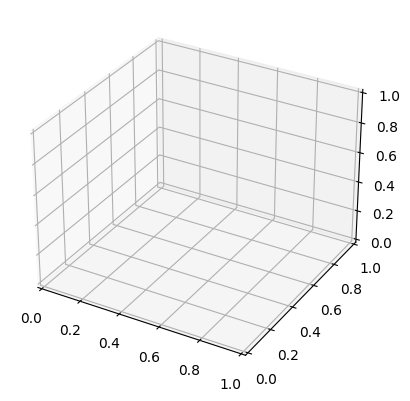

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Extract the vertex coordinates and triangle faces of the mesh
vertices, faces, _, _ = measure.marching_cubes(label_train00, 0, spacing = (0.5, 0.5, 2))

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection with the triangle faces
mesh = Poly3DCollection(vertices[faces], alpha=0.8, edgecolor='k')
mesh.set_facecolor((0.5, 0.5, 0.5))

# Add the mesh to the axes
ax.add_collection(mesh)

# Set the axis limits
ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())

# Show the plot
plt.show()


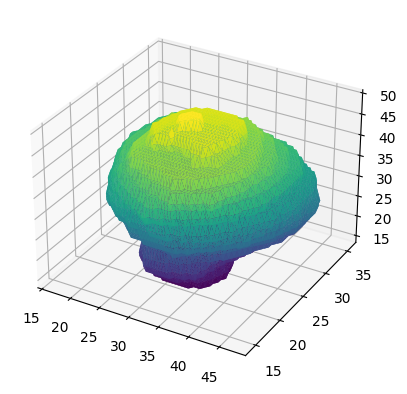

In [15]:
# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle faces
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles, alpha = 1, cmap='viridis')

# Show the plot
plt.show()

### Divide this triangulated surface into two surfaces

In [33]:
vertices

array([[16.5, 27.5, 28. ],
       [17. , 27.5, 26. ],
       [17. , 27. , 28. ],
       ...,
       [47. , 30. , 28. ],
       [47. , 30.5, 28. ],
       [47. , 31. , 28. ]])

In [34]:
vertices[vertices[:, 0] <31.5]

array([[16.5, 27.5, 28. ],
       [17. , 27.5, 26. ],
       [17. , 27. , 28. ],
       ...,
       [31. , 34.5, 36. ],
       [31. , 34. , 26. ],
       [31. , 34. , 32. ]])

IndexError: index 3201 is out of bounds for axis 0 with size 3201

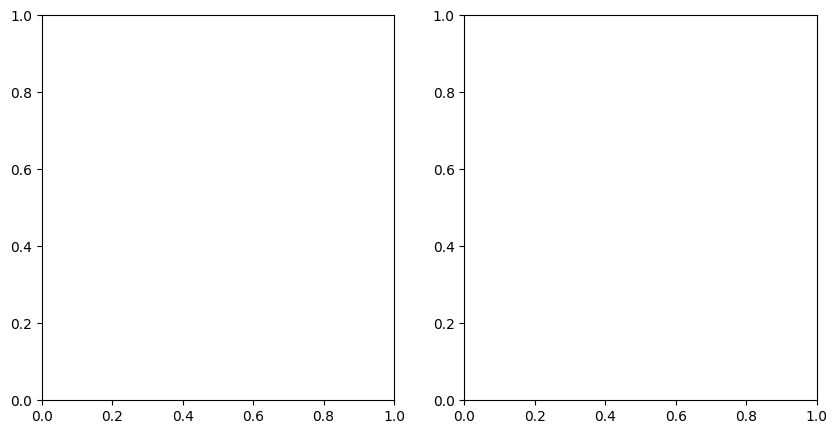

In [37]:
# Let's start easy and split this triangulated surface into 2 surfaces, left and right
sagittal_plane = np.median(vertices[:, 0].flatten())

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Split the vertices into left and right surfaces based on the x-coordinate
vertices_left = vertices[vertices[:, 0] < sagittal_plane]
vertices_right = vertices[vertices[:, 0] >= sagittal_plane]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the left surface in the first subplot
ax1.add_collection(Poly3DCollection(vertices_left[triangles], alpha=0.5, facecolor='blue'))
ax1.set_title('Left Surface')
ax1.set_xlabel('X (mm)')
ax1.set_ylabel('Y (mm)')
ax1.set_zlabel('Z (mm)')

# Plot the right surface in the second subplot
ax2.add_collection(Poly3DCollection(vertices_right[triangles], alpha=0.5, facecolor='red'))
ax2.set_title('Right Surface')
ax2.set_xlabel('X (mm)')
ax2.set_ylabel('Y (mm)')
ax2.set_zlabel('Z (mm)')

plt.show()


In [24]:
vertices[:,0].min(); vertices[:, 0].max()


94.0

In [14]:
triangles[0]

array([2, 1, 0], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[triangles])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

plt.tight_layout()
plt.show()

In [2]:
import visvis as vv
verts, faces, normals, values = measure.marching_cubes(label_train00, 0)
vv.mesh(np.fliplr(verts), faces, normals, values)
vv.use().Run()

: 

: 